# Imports

In [1]:
import os
os.chdir('/DeepPurpose/')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import random
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from matplotlib.pyplot import figure

In [5]:
load_process_DAVIS()

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


(array(['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
        'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
        'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N', ...,
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4',
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4',
        'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4'],
       dtype='<U92'),
 array(['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQP

In [75]:
download_BindingDB()

Beginning to download dataset...
Beginning to extract zip file...
Done!


'./data/BindingDB_All.tsv'

In [2]:
X_drug, X_target, y  = process_BindingDB('/home/sars-busters-consolidated/data/BindingDB_All.tsv',
                                         y = 'Kd', 
                                         binary = True, ## Keep it binary true for classification task
                                         convert_to_log = True)

Loading Dataset from path...


b'Skipping line 896772: expected 193 fields, saw 205\nSkipping line 896798: expected 193 fields, saw 205\n'
b'Skipping line 929491: expected 193 fields, saw 205\n'
b'Skipping line 952161: expected 193 fields, saw 265\n'
b'Skipping line 1355895: expected 193 fields, saw 241\n'
b'Skipping line 1469800: expected 193 fields, saw 241\nSkipping line 1469801: expected 193 fields, saw 241\nSkipping line 1469802: expected 193 fields, saw 241\nSkipping line 1469803: expected 193 fields, saw 241\nSkipping line 1469804: expected 193 fields, saw 241\nSkipping line 1469805: expected 193 fields, saw 241\nSkipping line 1469806: expected 193 fields, saw 241\nSkipping line 1469807: expected 193 fields, saw 241\nSkipping line 1469808: expected 193 fields, saw 241\n'
b'Skipping line 1483073: expected 193 fields, saw 205\n'
b'Skipping line 1502296: expected 193 fields, saw 241\nSkipping line 1502297: expected 193 fields, saw 241\nSkipping line 1502298: expected 193 fields, saw 241\nSkipping line 1502299: e

Beginning Processing...
There are 70750 drug target pairs.
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter


# Original DeepPurpose

In [3]:
drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, 
                                X_target, 
                                y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Drug Target Interaction Prediction Mode...
in total: 70750 drug-target pairs
encoding drug...
unique drugs: 13392
encoding protein...
unique target sequence: 1507
splitting dataset...
Done.


In [34]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [146]:
train.shape

(49525, 6)

In [145]:
test.shape

(11973, 11)

Let's use 4 GPUs!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69598. Total time 0.00305 hours
Training at Epoch 1 iteration 100 with loss 0.37188. Total time 0.01388 hours
Training at Epoch 1 iteration 200 with loss 0.30791. Total time 0.025 hours
Training at Epoch 1 iteration 300 with loss 0.40230. Total time 0.03583 hours
Validation at Epoch 1, AUROC: 0.83072 , AUPRC: 0.55703 , F1: 0.20652 , Cross-entropy Loss: 4.98920
Training at Epoch 2 iteration 0 with loss 0.31423. Total time 0.05 hours
Training at Epoch 2 iteration 100 with loss 0.25581. Total time 0.06111 hours
Training at Epoch 2 iteration 200 with loss 0.35900. Total time 0.07166 hours
Training at Epoch 2 iteration 300 with loss 0.31057. Total time 0.08222 hours
Validation at Epoch 2, AUROC: 0.83965 , AUPRC: 0.59213 , F1: 0.21329 , Cross-entropy Loss: 4.96967
Training at Epoch 3 iteration 0 with loss 0.41414. Total time 0.09611 hours
Training at Epoch 3 iteration 100 with loss 

Training at Epoch 21 iteration 0 with loss 0.29922. Total time 0.91555 hours
Training at Epoch 21 iteration 100 with loss 0.25198. Total time 0.92611 hours
Training at Epoch 21 iteration 200 with loss 0.24527. Total time 0.93666 hours
Training at Epoch 21 iteration 300 with loss 0.36123. Total time 0.94722 hours
Validation at Epoch 21, AUROC: 0.85482 , AUPRC: 0.63702 , F1: 0.43698 , Cross-entropy Loss: 4.33993
Training at Epoch 22 iteration 0 with loss 0.33358. Total time 0.96083 hours
Training at Epoch 22 iteration 100 with loss 0.26992. Total time 0.97111 hours
Training at Epoch 22 iteration 200 with loss 0.22073. Total time 0.98166 hours
Training at Epoch 22 iteration 300 with loss 0.37179. Total time 0.99222 hours
Validation at Epoch 22, AUROC: 0.85444 , AUPRC: 0.63543 , F1: 0.51839 , Cross-entropy Loss: 4.34483
Training at Epoch 23 iteration 0 with loss 0.38425. Total time 1.00583 hours
Training at Epoch 23 iteration 100 with loss 0.27228. Total time 1.01611 hours
Training at Epoc

Training at Epoch 41 iteration 0 with loss 0.24516. Total time 1.81555 hours
Training at Epoch 41 iteration 100 with loss 0.27882. Total time 1.82611 hours
Training at Epoch 41 iteration 200 with loss 0.19732. Total time 1.83638 hours
Training at Epoch 41 iteration 300 with loss 0.31567. Total time 1.84694 hours
Validation at Epoch 41, AUROC: 0.85513 , AUPRC: 0.64036 , F1: 0.36225 , Cross-entropy Loss: 4.52055
Training at Epoch 42 iteration 0 with loss 0.33696. Total time 1.86055 hours
Training at Epoch 42 iteration 100 with loss 0.25136. Total time 1.87083 hours
Training at Epoch 42 iteration 200 with loss 0.27334. Total time 1.88138 hours
Training at Epoch 42 iteration 300 with loss 0.30746. Total time 1.89194 hours
Validation at Epoch 42, AUROC: 0.85584 , AUPRC: 0.63796 , F1: 0.44540 , Cross-entropy Loss: 4.36434
Training at Epoch 43 iteration 0 with loss 0.27318. Total time 1.90527 hours
Training at Epoch 43 iteration 100 with loss 0.27495. Total time 1.91583 hours
Training at Epoc

Training at Epoch 61 iteration 0 with loss 0.28735. Total time 2.72388 hours
Training at Epoch 61 iteration 100 with loss 0.27282. Total time 2.73416 hours
Training at Epoch 61 iteration 200 with loss 0.29311. Total time 2.74472 hours
Training at Epoch 61 iteration 300 with loss 0.34035. Total time 2.75527 hours
Validation at Epoch 61, AUROC: 0.85409 , AUPRC: 0.62774 , F1: 0.46116 , Cross-entropy Loss: 4.33505
Training at Epoch 62 iteration 0 with loss 0.38238. Total time 2.76861 hours
Training at Epoch 62 iteration 100 with loss 0.20935. Total time 2.77916 hours
Training at Epoch 62 iteration 200 with loss 0.23065. Total time 2.78972 hours
Training at Epoch 62 iteration 300 with loss 0.33074. Total time 2.80027 hours
Validation at Epoch 62, AUROC: 0.85592 , AUPRC: 0.63724 , F1: 0.49629 , Cross-entropy Loss: 4.31065
Training at Epoch 63 iteration 0 with loss 0.35489. Total time 2.81416 hours
Training at Epoch 63 iteration 100 with loss 0.31344. Total time 2.825 hours
Training at Epoch 

Training at Epoch 81 iteration 0 with loss 0.32857. Total time 3.63416 hours
Training at Epoch 81 iteration 100 with loss 0.31947. Total time 3.64444 hours
Training at Epoch 81 iteration 200 with loss 0.33112. Total time 3.655 hours
Training at Epoch 81 iteration 300 with loss 0.23307. Total time 3.66555 hours
Validation at Epoch 81, AUROC: 0.85438 , AUPRC: 0.63926 , F1: 0.41839 , Cross-entropy Loss: 4.38386
Training at Epoch 82 iteration 0 with loss 0.21928. Total time 3.67888 hours
Training at Epoch 82 iteration 100 with loss 0.26808. Total time 3.68944 hours
Training at Epoch 82 iteration 200 with loss 0.27686. Total time 3.7 hours
Training at Epoch 82 iteration 300 with loss 0.26687. Total time 3.71055 hours
Validation at Epoch 82, AUROC: 0.85487 , AUPRC: 0.63685 , F1: 0.38471 , Cross-entropy Loss: 4.48150
Training at Epoch 83 iteration 0 with loss 0.22840. Total time 3.72472 hours
Training at Epoch 83 iteration 100 with loss 0.39698. Total time 3.73527 hours
Training at Epoch 83 i

Validation at Epoch 100 , AUROC: 0.85087 , AUPRC: 0.63303 , F1: 0.47746 , Cross-entropy Loss: 4.38631
--- Training Finished ---


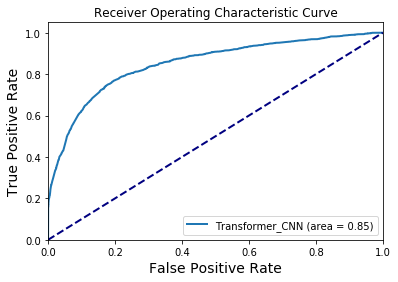

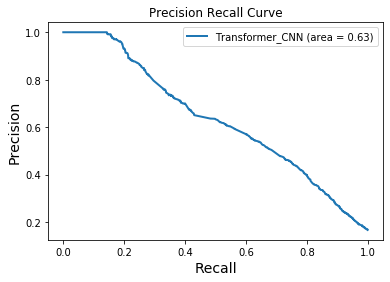

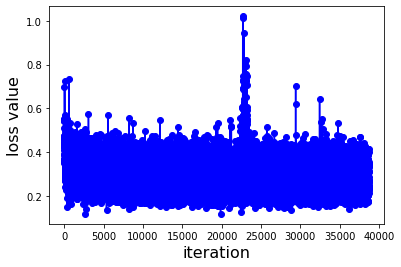

In [4]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [15]:
model.save_model('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

In [14]:
os.listdir('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

['deep_purpose',
 'data',
 'vaenet',
 'Network Models',
 'vecnet',
 'siamese',
 'data_preperation',
 'predictions',
 '.ipynb_checkpoints',
 'Paper Visualizations',
 'DeepPurpose2_rm',
 'data_rm']

In [349]:
model = model.load('/home/sars-busters-consolidated/deep_purpose/save_folder/pretrained_model/transformer_CNN')

AttributeError: 'DBTA' object has no attribute 'load'

In [84]:
test_preidcted = model.predict(test)
test['Y_predicted'] = test_preidcted

In [83]:
train.to_csv('../data/Transformer_CNN_train.csv')
val.to_csv('../data/Transformer_CNN_val.csv')
test.to_csv('../data/Transformer_CNN_test.csv')

# Prediction on SARS-CoV2 Sequences

In [4]:
train = pd.read_csv('../data/Transformer_CNN_train.csv')
val = pd.read_csv('../data/Transformer_CNN_val.csv')
test = pd.read_csv('../data/Transformer_CNN_test.csv')

In [9]:
external_targets = pd.read_csv('/data/External Predictions/SARS Sequences/20201203_Targets_Sequences_SARS_Cov2.csv')

In [157]:
train_chemicals = dict()

for index, row in tqdm(train.iterrows()):
    train_chemicals[row['SMILES']] = row['drug_encoding']

49525it [00:04, 10161.42it/s]


In [158]:
sars_targets = dict()

for index, row in tqdm(external_targets.iterrows()):
    sars_targets[row['ID']] = row['Sequence']

33it [00:00, 5347.81it/s]


In [163]:
SMILES_list = []
target_seq_list = []
# drug_encoding_list = []
# target_encoding_list = []

sars_test = pd.DataFrame()

for ligand in tqdm(list(train_chemicals.keys())):
    for target in list(sars_targets.keys()):
        SMILES_list.append(ligand)
        target_seq_list.append(sars_targets[target])
        # drug_encoding_list.append(train_chemicals[ligand])
        # target_encoding_list.append(list(sars_targets[target])) # + ['?'] * (1000 - len(list(sars_targets[target]))))
        
sars_test['SMILES'] = SMILES_list
sars_test['Target Sequence'] = target_seq_list
# sars_test['drug_encoding'] = drug_encoding_list
# sars_test['target_encoding'] = target_encoding_list
sars_test['Label'] = 1

100%|██████████| 10416/10416 [00:00<00:00, 108051.10it/s]


In [164]:
sars_test_processed, _, _ = data_process(sars_test['SMILES'], 
                         sars_test['Target Sequence'], 
                         y, 
                         drug_encoding,
                         target_encoding, 
                         split_method='random',
                         frac=[1.0,0,0])

Drug Target Interaction Prediction Mode...
in total: 70750 drug-target pairs
encoding drug...
unique drugs: 2144
encoding protein...
unique target sequence: 33
splitting dataset...
Done.


In [166]:
sars_test_preidcted = model.predict(sars_test_processed)

predicting...


In [167]:
sars_test_processed['Y_predicted'] = sars_test_preidcted

In [168]:
sars_test_processed.to_csv('sars_test_processed.csv')

In [2]:
sars_test_processed = pd.read_csv('sars_test_processed.csv')

In [5]:
# model.__dict__

ligands = list(set(sars_test_processed['SMILES'].tolist()))
ligand_degree_dict = dict()

train_pos = train[train['Label'] == 1]
train_neg = train[train['Label'] == 0]

for ligand in tqdm(ligands):
    ligand_degree_dict[ligand] = dict()
    ligand_degree_dict[ligand]['pos_deg'] = len(train_pos[train_pos['SMILES'] == ligand])
    ligand_degree_dict[ligand]['neg_deg'] = len(train_neg[train_neg['SMILES'] == ligand])
    

100%|██████████| 2144/2144 [00:13<00:00, 157.68it/s]


In [6]:
pos_deg_list = []
neg_deg_list = []
deg_ratio_list = []

for index, row in tqdm(sars_test_processed.iterrows()):
    
    if ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg'] != 0:
        pos_deg_list.append(ligand_degree_dict[row['SMILES']]['pos_deg'])
        neg_deg_list.append(ligand_degree_dict[row['SMILES']]['neg_deg'])
        deg_ratio_list.append(ligand_degree_dict[row['SMILES']]['pos_deg']/(ligand_degree_dict[row['SMILES']]['pos_deg']+ligand_degree_dict[row['SMILES']]['neg_deg']))
    else:
        pos_deg_list.append(-1)
        neg_deg_list.append(-1)
        deg_ratio_list.append(-1)
        
sars_test_processed['pos_deg'] = pos_deg_list
sars_test_processed['neg_deg'] = neg_deg_list
sars_test_processed['deg_ratio'] = deg_ratio_list

70750it [00:11, 5949.20it/s]


In [7]:
sars_test_processed = sars_test_processed[sars_test_processed['deg_ratio'] != -1]

In [10]:
sars_test_processed_subset = sars_test_processed[sars_test_processed['Target Sequence'].isin(external_targets['Sequence'].tolist()[0:1])]

In [11]:
sars_test_processed_subset

,Unnamed: 0,SMILES,Target Sequence,Label,drug_encoding,target_encoding,Y_predicted,pos_deg,neg_deg,deg_ratio
0,0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 757, 286, 178, 965, 22, 763, 10...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
33,33,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 467, 286, 178, 965, 22, 763, 10...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
66,66,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([2070, 1446, 2218, 127, 640, 0, ...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
99,99,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 286, 113, 122, 96, 234, 1545, 9...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
132,132,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 428, 881, 96, 255, 818, 2137, ...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...
70587,70587,COc1nc2ccc(cc2c(Cl)c1OCC(F)(F)F)C(O)(c1cnc(C)n...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 92, 607, 1071, 755, 70, 119, 1...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,1,0,1.00
70620,70620,COc1cc(OC)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cnn(C)c3...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 287, 677, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,0,7,0.00
70653,70653,COc1cc(OC)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cn[nH]c3...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,1,"(array([ 287, 677, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,2,6,0.25
70686,70686,COc1cc(O)c2CN(CCN(c3ccc4ncc(nc4c3)-c3cnn(C)c3)...,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,0,"(array([ 287, 744, 277, 596, 379, 611, 3...","['M', 'P', 'A', 'A', 'A', 'G', 'D', 'G', 'L', ...",0.010763,0,8,0.00


In [12]:
from scipy import stats

stats.spearmanr(sars_test_processed['pos_deg'].tolist(),sars_test_processed['Y_predicted'].tolist())

SpearmanrResult(correlation=-6.8207261196245e-05, pvalue=0.9855255390445837)

Text(0, 0.5, 'Prediction - DeepPurpose')

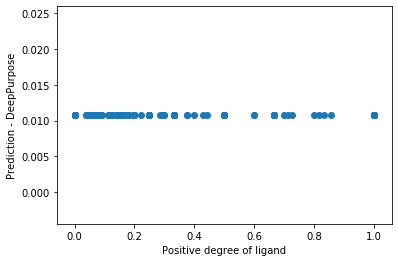

In [13]:
plt.scatter(sars_test_processed_subset['deg_ratio'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Positive degree of ligand')
plt.ylabel('Prediction - DeepPurpose')

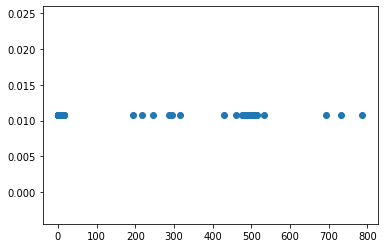

In [14]:
plt.scatter(sars_test_processed_subset['neg_deg'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())

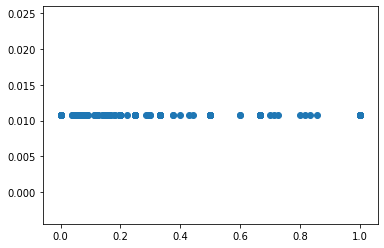

In [15]:
plt.scatter(sars_test_processed_subset['deg_ratio'].tolist(),sars_test_processed_subset['Y_predicted'].tolist())

# Randomly assigning SMILEs and Sequences

In [2]:
def swapper(intake_list):
    
    swap_dict = {}
    bag = set(intake_list)
    buffer = set()
    
    for item in set(intake_list):
        
        if len(bag) > 0:
            #selected = bag.pop()
            selected = random.choice(list(bag))
            bag.remove(selected)
        else:
            selected = random.choice(list(buffer))
            buffer.remove(selected)
        
        if item != selected:
            swap_dict.update({item:selected})
        else:
            print(f'Same item selected item {item} selected {selected}')
            buffer.add(selected)
    
    assert len(bag) == 0, bag
    
    return swap_dict
            

In [3]:
fake_X_drug_mapping = swapper(list(X_drug))

NameError: name 'X_drug' is not defined

In [135]:
fake_X_target_mapping = swapper(list(X_target))

In [138]:
correct_dataset = pd.DataFrame({'X_drug': X_drug, 'X_target': X_target, 'y': y})

In [141]:
correct_dataset['fake_X_drug'] = correct_dataset['X_drug'].map(fake_X_drug_mapping)
correct_dataset['fake_X_target'] = correct_dataset['X_target'].map(fake_X_target_mapping)

In [149]:
for column in correct_dataset.columns:
    print(correct_dataset[correct_dataset[column].isna()])

Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []
                                                  X_drug  \
64590  CCOC(=O)\C=C1/C2C(C3CCC2C=C3)C(=O)N1Cc1ccc(cc1...   

                                                X_target  y fake_X_drug  \
64590  MMLNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...  1         NaN   

                                           fake_X_target  
64590  MESLVFARRSGPTPSAAELARPLAEGLIKSPKPLMKKQAVKRHHHK...  
Empty DataFrame
Columns: [X_drug, X_target, y, fake_X_drug, fake_X_target]
Index: []


In [151]:
correct_dataset = correct_dataset[~correct_dataset['fake_X_drug'].isna()]

In [152]:
drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(list(correct_dataset['fake_X_drug']), 
                                list(correct_dataset['fake_X_target']), 
                                y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Drug Target Interaction Prediction Mode...
in total: 70749 drug-target pairs
encoding drug...
unique drugs: 13391
encoding protein...
unique target sequence: 1507
splitting dataset...
Done.


Let's use 4 GPUs!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69130. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.42569. Total time 0.01138 hours
Training at Epoch 1 iteration 200 with loss 0.30406. Total time 0.0225 hours
Training at Epoch 1 iteration 300 with loss 0.28063. Total time 0.03388 hours
Validation at Epoch 1, AUROC: 0.79855 , AUPRC: 0.52682 , F1: 0.23404 , Cross-entropy Loss: 4.92086
Training at Epoch 2 iteration 0 with loss 0.29621. Total time 0.04805 hours
Training at Epoch 2 iteration 100 with loss 0.34574. Total time 0.05944 hours
Training at Epoch 2 iteration 200 with loss 0.26741. Total time 0.07055 hours
Training at Epoch 2 iteration 300 with loss 0.38992. Total time 0.08194 hours
Validation at Epoch 2, AUROC: 0.81727 , AUPRC: 0.55817 , F1: 0.23269 , Cross-entropy Loss: 4.92574
Training at Epoch 3 iteration 0 with loss 0.33012. Total time 0.09611 hours
Training at Epoch 3 iteration 100 with loss 

Training at Epoch 21 iteration 0 with loss 0.31121. Total time 0.94944 hours
Training at Epoch 21 iteration 100 with loss 0.30510. Total time 0.96055 hours
Training at Epoch 21 iteration 200 with loss 0.25477. Total time 0.97138 hours
Training at Epoch 21 iteration 300 with loss 0.30552. Total time 0.9825 hours
Validation at Epoch 21, AUROC: 0.83321 , AUPRC: 0.59798 , F1: 0.40883 , Cross-entropy Loss: 4.57426
Training at Epoch 22 iteration 0 with loss 0.20784. Total time 0.99638 hours
Training at Epoch 22 iteration 100 with loss 0.32206. Total time 1.0075 hours
Training at Epoch 22 iteration 200 with loss 0.24705. Total time 1.01833 hours
Training at Epoch 22 iteration 300 with loss 0.33199. Total time 1.02944 hours
Validation at Epoch 22, AUROC: 0.83500 , AUPRC: 0.59864 , F1: 0.48387 , Cross-entropy Loss: 4.53033
Training at Epoch 23 iteration 0 with loss 0.29039. Total time 1.04333 hours
Training at Epoch 23 iteration 100 with loss 0.33101. Total time 1.05444 hours
Training at Epoch 

Training at Epoch 41 iteration 0 with loss 0.27337. Total time 1.89166 hours
Training at Epoch 41 iteration 100 with loss 0.33513. Total time 1.9025 hours
Training at Epoch 41 iteration 200 with loss 0.30284. Total time 1.91361 hours
Training at Epoch 41 iteration 300 with loss 0.30459. Total time 1.92444 hours
Validation at Epoch 41, AUROC: 0.83589 , AUPRC: 0.60828 , F1: 0.35689 , Cross-entropy Loss: 4.57425
Training at Epoch 42 iteration 0 with loss 0.26689. Total time 1.93861 hours
Training at Epoch 42 iteration 100 with loss 0.32161. Total time 1.94972 hours
Training at Epoch 42 iteration 200 with loss 0.30036. Total time 1.96055 hours
Training at Epoch 42 iteration 300 with loss 0.23703. Total time 1.97166 hours
Validation at Epoch 42, AUROC: 0.83642 , AUPRC: 0.60910 , F1: 0.48433 , Cross-entropy Loss: 4.41805
Training at Epoch 43 iteration 0 with loss 0.29252. Total time 1.98583 hours
Training at Epoch 43 iteration 100 with loss 0.29255. Total time 1.99666 hours
Training at Epoch

Training at Epoch 61 iteration 0 with loss 0.31715. Total time 2.83333 hours
Training at Epoch 61 iteration 100 with loss 0.32844. Total time 2.84416 hours
Training at Epoch 61 iteration 200 with loss 0.21471. Total time 2.85527 hours
Training at Epoch 61 iteration 300 with loss 0.30335. Total time 2.86611 hours
Validation at Epoch 61, AUROC: 0.83464 , AUPRC: 0.60277 , F1: 0.43436 , Cross-entropy Loss: 4.56450
Training at Epoch 62 iteration 0 with loss 0.32042. Total time 2.88027 hours
Training at Epoch 62 iteration 100 with loss 0.21195. Total time 2.89138 hours
Training at Epoch 62 iteration 200 with loss 0.26822. Total time 2.90222 hours
Training at Epoch 62 iteration 300 with loss 0.29086. Total time 2.91305 hours
Validation at Epoch 62, AUROC: 0.83334 , AUPRC: 0.60535 , F1: 0.39325 , Cross-entropy Loss: 4.56449
Training at Epoch 63 iteration 0 with loss 0.25974. Total time 2.92722 hours
Training at Epoch 63 iteration 100 with loss 0.35571. Total time 2.93833 hours
Training at Epoc

Training at Epoch 81 iteration 0 with loss 0.30784. Total time 3.77555 hours
Training at Epoch 81 iteration 100 with loss 0.18767. Total time 3.78666 hours
Training at Epoch 81 iteration 200 with loss 0.20510. Total time 3.79777 hours
Training at Epoch 81 iteration 300 with loss 0.23073. Total time 3.80861 hours
Validation at Epoch 81, AUROC: 0.83332 , AUPRC: 0.60395 , F1: 0.52092 , Cross-entropy Loss: 4.47176
Training at Epoch 82 iteration 0 with loss 0.39904. Total time 3.82277 hours
Training at Epoch 82 iteration 100 with loss 0.32014. Total time 3.83388 hours
Training at Epoch 82 iteration 200 with loss 0.40283. Total time 3.84472 hours
Training at Epoch 82 iteration 300 with loss 0.29341. Total time 3.85583 hours
Validation at Epoch 82, AUROC: 0.83184 , AUPRC: 0.60773 , F1: 0.39053 , Cross-entropy Loss: 4.52544
Training at Epoch 83 iteration 0 with loss 0.34736. Total time 3.87 hours
Training at Epoch 83 iteration 100 with loss 0.24237. Total time 3.88111 hours
Training at Epoch 8

Validation at Epoch 100 , AUROC: 0.83990 , AUPRC: 0.61298 , F1: 0.47065 , Cross-entropy Loss: 4.49127
--- Training Finished ---


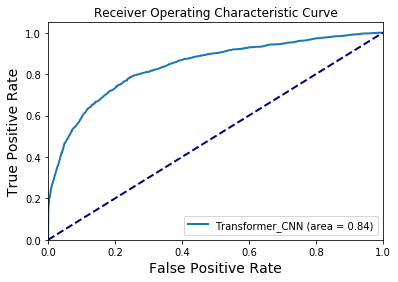

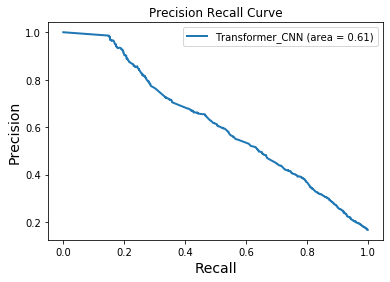

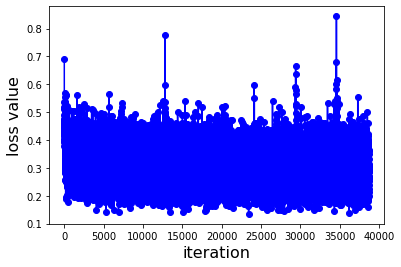

In [153]:
model = models.model_initialize(**config)
model.train(train, val, test)

# Degree Analysis

## Imports

In [92]:
from tqdm import tqdm 

import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.utils import plot_model
import seaborn as sb

## Initialization

In [95]:
all_data = pd.concat([train,val,test])

In [96]:
ligand_degree_dict = dict()

for chem in tqdm(set(all_data['SMILES'].tolist())):
    ligand_degree_dict[chem] = dict() 
    sub_df = all_data[all_data['SMILES'] == chem]
    ligand_degree_dict[chem]['pos_deg'] = sub_df['Label'].tolist().count(1)
    ligand_degree_dict[chem]['neg_deg'] = sub_df['Label'].tolist().count(0)
    ligand_degree_dict[chem]['deg_ratio'] = ligand_degree_dict[chem]['pos_deg']/(ligand_degree_dict[chem]['pos_deg']+ligand_degree_dict[chem]['neg_deg'])

100%|██████████| 13392/13392 [01:49<00:00, 122.67it/s]


In [97]:
protein_degree_dict = dict()

for prot in tqdm(set(all_data['Target Sequence'].tolist())):
    protein_degree_dict[prot] = dict() 
    sub_df = all_data[all_data['Target Sequence'] == prot]
    protein_degree_dict[prot]['pos_deg'] = sub_df['Label'].tolist().count(1)
    protein_degree_dict[prot]['neg_deg'] = sub_df['Label'].tolist().count(0)
    protein_degree_dict[prot]['deg_ratio'] = protein_degree_dict[prot]['pos_deg']/(protein_degree_dict[prot]['pos_deg']+protein_degree_dict[prot]['neg_deg'])

100%|██████████| 1507/1507 [00:12<00:00, 120.61it/s]


In [98]:
train_ligand_degree_dict = dict()

for chem in tqdm(set(train['SMILES'].tolist())):
    train_ligand_degree_dict[chem] = dict() 
    sub_df = train[train['SMILES'] == chem]
    train_ligand_degree_dict[chem]['pos_deg'] = sub_df['Label'].tolist().count(1)
    train_ligand_degree_dict[chem]['neg_deg'] = sub_df['Label'].tolist().count(0)
    train_ligand_degree_dict[chem]['deg_ratio'] = train_ligand_degree_dict[chem]['pos_deg']/(train_ligand_degree_dict[chem]['pos_deg'] + train_ligand_degree_dict[chem]['neg_deg'])

100%|██████████| 10416/10416 [01:01<00:00, 169.61it/s]


In [99]:
train_protein_degree_dict = dict()

for prot in tqdm(set(train['Target Sequence'].tolist())):
    train_protein_degree_dict[prot] = dict() 
    sub_df = train[train['Target Sequence'] == prot]
    train_protein_degree_dict[prot]['pos_deg'] = sub_df['Label'].tolist().count(1)
    train_protein_degree_dict[prot]['neg_deg'] = sub_df['Label'].tolist().count(0)
    train_protein_degree_dict[prot]['deg_ratio'] = train_protein_degree_dict[prot]['pos_deg']/(train_protein_degree_dict[prot]['pos_deg'] + train_protein_degree_dict[prot]['neg_deg'])

100%|██████████| 1391/1391 [00:08<00:00, 171.33it/s]


(array([11832.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2318.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

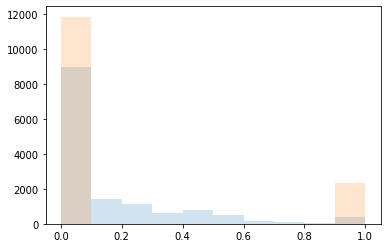

In [100]:
test_preidcted = test['Y_predicted'].tolist()
plt.hist(test_preidcted,alpha=0.2)
plt.hist(test['Label'].tolist(),alpha=0.2)

## Distributions of positive degree and degree ratio

In [101]:
test_false_positive = test[test['Label']==0].sort_values(by='Y_predicted', ascending=False)
test_false_positive_100 = test_false_positive.head(100)

test_ligand_deg = []
test_prot_deg = []
test_ligand_deg_ratio = []
test_prot_deg_ratio = []

for index, row in tqdm(test_false_positive_100.iterrows()):
    if row['SMILES'] in train_ligand_degree_dict.keys():
        test_ligand_deg.append(train_ligand_degree_dict[row['SMILES']]['pos_deg'])
        test_ligand_deg_ratio.append(train_ligand_degree_dict[row['SMILES']]['deg_ratio'])
    else:
        test_ligand_deg.append(-1)
        test_ligand_deg_ratio.append(-1)
    
    if row['Target Sequence'] in train_protein_degree_dict.keys():
        test_prot_deg.append(train_protein_degree_dict[row['Target Sequence']]['pos_deg'])
        test_prot_deg_ratio.append(train_protein_degree_dict[row['Target Sequence']]['deg_ratio'])
    else:
        test_prot_deg.append(-1)
        test_prot_deg_ratio.append(-1)
        
test_false_positive_100['ligand_deg'] = test_ligand_deg
test_false_positive_100['prot_deg'] = test_prot_deg
test_false_positive_100['ligand_deg_ratio'] = test_ligand_deg_ratio
test_false_positive_100['prot_deg_ratio'] = test_prot_deg_ratio

test_false_positive_100_seen_ligand = test_false_positive_1000[test_false_positive_1000['ligand_deg'] != -1] ## intersection of train and test
test_false_positive_100_seen_target = test_false_positive_1000[test_false_positive_1000['prot_deg'] != -1] ## intersection of train and test

100it [00:00, 4449.77it/s]
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [102]:
all_data_ligand_deg = []
all_data_prot_deg = []
all_data_ligand_deg_ratio = []
all_data_prot_deg_ratio = []

for index, row in tqdm(all_data.iterrows()):
    all_data_ligand_deg.append(ligand_degree_dict[row['SMILES']]['pos_deg'])
    all_data_prot_deg.append(protein_degree_dict[row['Target Sequence']]['pos_deg'])
    all_data_ligand_deg_ratio.append(ligand_degree_dict[row['SMILES']]['deg_ratio'])
    all_data_prot_deg_ratio.append(protein_degree_dict[row['Target Sequence']]['deg_ratio'])

70750it [00:08, 7872.77it/s]


In [301]:
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(all_data_ligand_deg,all_data_prot_deg,color='yellow',alpha=0.1,label='BindingDB')
#plt.scatter(test_false_positive_1000_seen_ligand['ligand_deg'].tolist(),test_false_positive_1000_seen_target['prot_deg'].tolist(),label='False Positives')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([1,500])
#plt.ylim([1,1400])
#plt.xlabel('Ligand degree')
#plt.ylabel('Target degree')
#plt.legend()

In [299]:
#all_total_degree = [sum(x) for x in zip(all_data_ligand_deg,all_data_prot_deg)]
#false_positive_total_degree = [sum(x) for x in zip(test_false_positive_100['ligand_deg'].tolist(),test_false_positive_100['prot_deg'].tolist())]

In [300]:
#figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
#plt.hist(all_total_degree,density=True,color='yellow',alpha=1,label='Dataset',bins=np.logspace(np.log10(1),np.log10(1000), 100))
#plt.hist(false_positive_total_degree,density=True,color='blue',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(1),np.log10(1000), 100))
#plt.legend()
#plt.xlabel('Sum of ligand and target degrees')
#plt.ylabel('Probability')
#plt.ylim([0,0.03])

(0, 0.03)

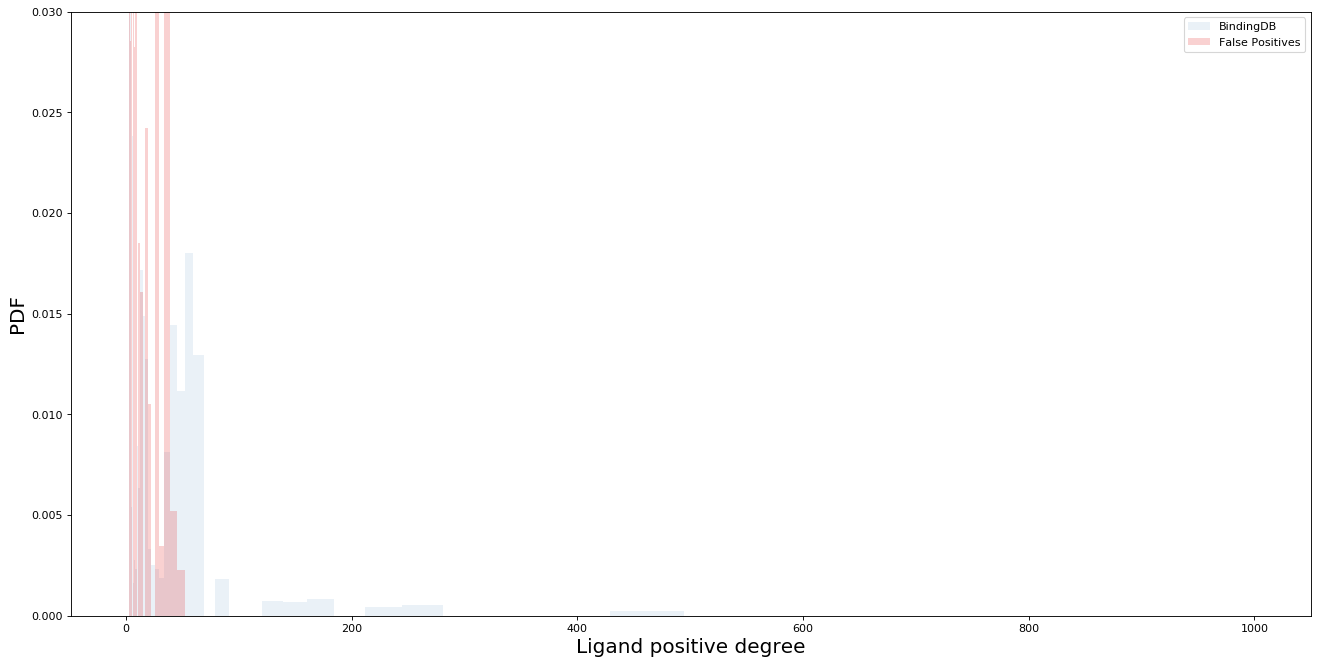

In [103]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.hist(all_data_ligand_deg,density=True,color='#377eb8',alpha=0.1,label='BindingDB',bins=np.logspace(np.log10(1),np.log10(1000), 50))
plt.hist(test_false_positive_100_seen_ligand['ligand_deg'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(1),np.log10(1000), 50))
plt.legend()
plt.xlabel('Ligand positive degree', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.ylim([0,0.03])

Text(0, 0.5, 'PDF')

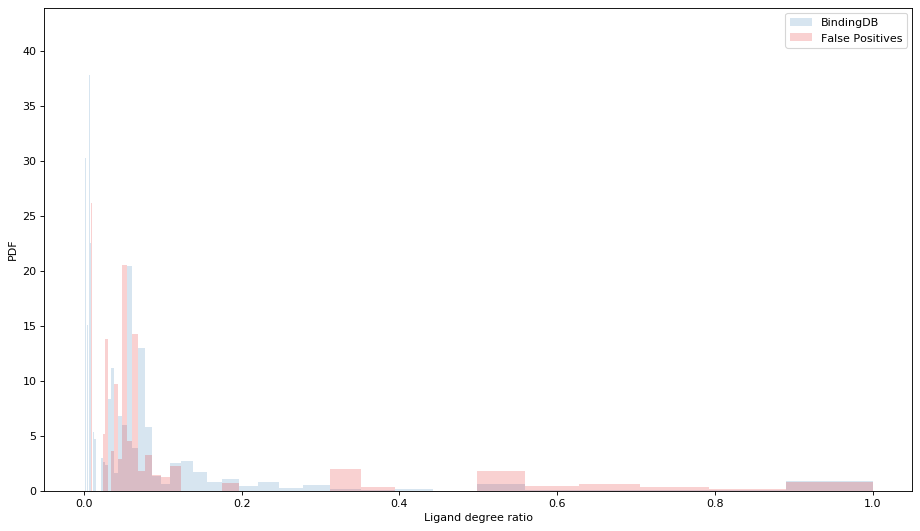

In [118]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist(all_data_ligand_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 100))
plt.hist(test_false_positive_100_seen_ligand['ligand_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(0.00001),np.log10(1), 100))
plt.legend()
plt.xlabel('Ligand degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
#plt.ylim([0,20])

(0, 0.05)

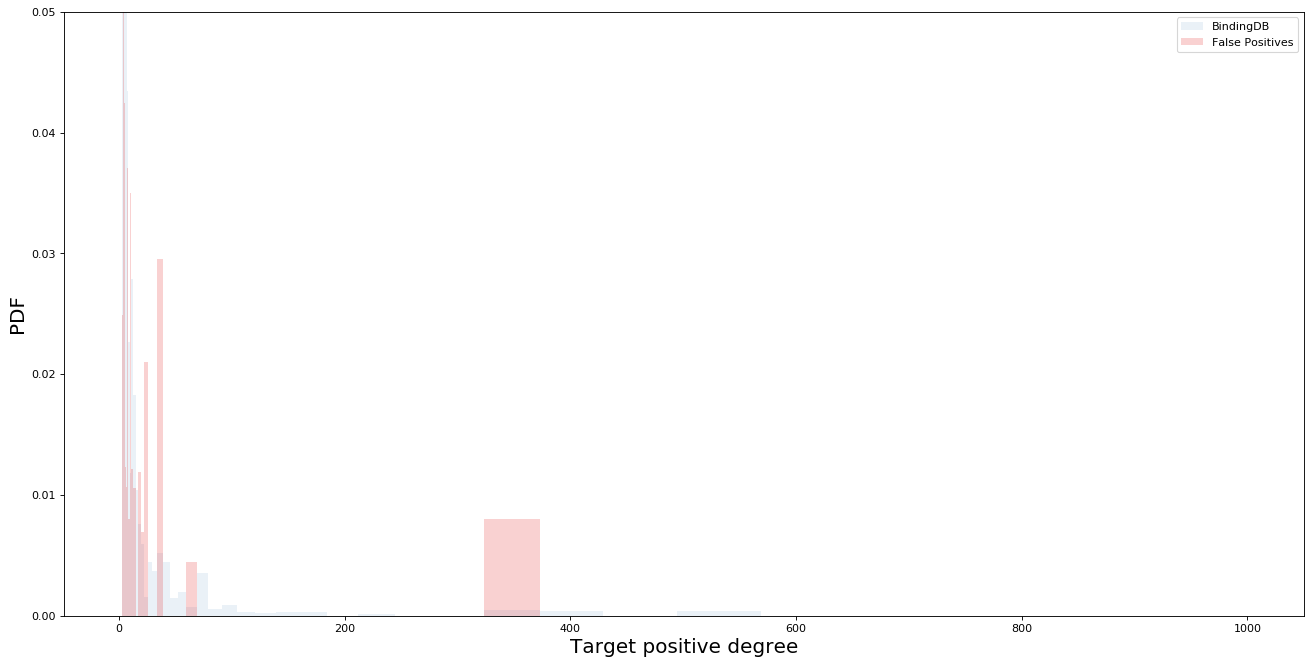

In [105]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.hist(all_data_prot_deg,density=True,color='#377eb8',alpha=0.1,label='BindingDB',bins=np.logspace(np.log10(1),np.log10(1000), 50))
plt.hist(test_false_positive_100_seen_target['prot_deg'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(1),np.log10(1000), 50))
plt.legend()
plt.xlabel('Target positive degree', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.ylim([0,0.05])

Text(0, 0.5, 'PDF')

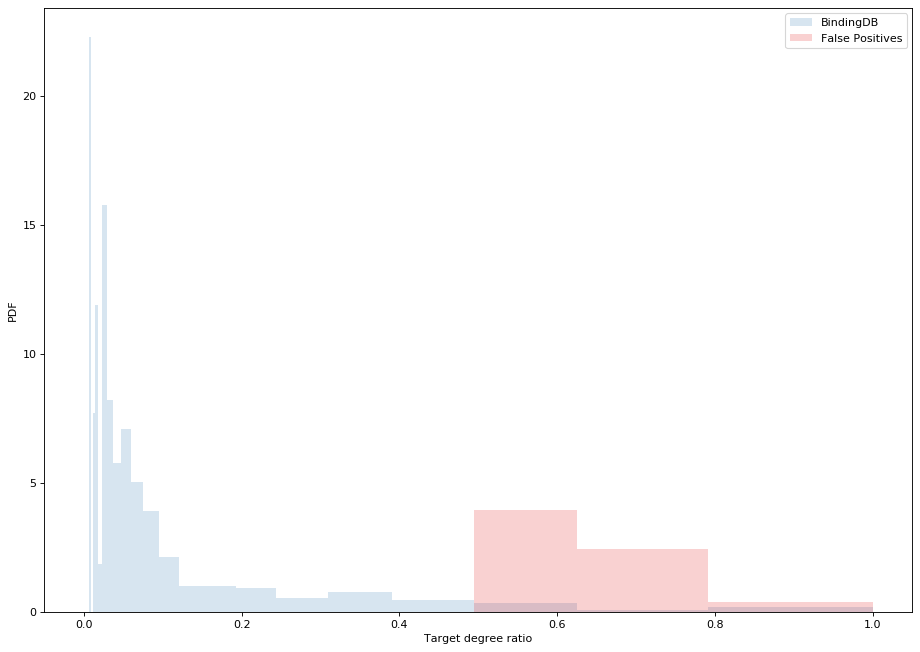

In [116]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.hist(all_data_prot_deg_ratio,density=True,color='#377eb8',alpha=0.2,label='BindingDB',bins=np.logspace(np.log10(0.00001),np.log10(1), 50))
plt.hist(test_false_positive_100_seen_target['prot_deg_ratio'].tolist(),density=True,color='#e41a1c',alpha=0.2,label='False Positives',bins=np.logspace(np.log10(0.00001),np.log10(1), 50))
plt.legend()
plt.xlabel('Target degree ratio', fontsize=10)
plt.ylabel('PDF', fontsize=10)
#plt.ylim([0,20])

## False positive checks for each node

In [17]:
ligands = list(set(test['SMILES'].tolist()))
ligand_degree_dict = dict()

train_pos = train[train['Label'] == 1]
train_neg = train[train['Label'] == 0]

for ligand in tqdm(ligands):
    ligand_degree_dict[ligand] = dict()
    ligand_degree_dict[ligand]['pos_deg'] = len(train_pos[train_pos['SMILES'] == ligand])
    ligand_degree_dict[ligand]['neg_deg'] = len(train_neg[train_neg['SMILES'] == ligand])

100%|██████████| 4002/4002 [00:25<00:00, 157.98it/s]


In [18]:
pos_deg_list = []
neg_deg_list = []
deg_ratio_list = []

for index, row in tqdm(test.iterrows()):
    if ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg'] != 0:
        pos_deg_list.append(ligand_degree_dict[row['SMILES']]['pos_deg'])
        neg_deg_list.append(ligand_degree_dict[row['SMILES']]['neg_deg'])
        deg_ratio_list.append(ligand_degree_dict[row['SMILES']]['pos_deg']/(ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg']))
    else:
        pos_deg_list.append(-1)
        neg_deg_list.append(-1)
        deg_ratio_list.append(-1)
        
test['pos_deg'] = pos_deg_list
test['neg_deg'] = neg_deg_list
test['deg_ratio'] = deg_ratio_list

14150it [00:02, 6352.57it/s]


In [23]:
test = test[test['deg_ratio'] != -1] ## Ligands with at least one annotation

In [37]:
pos_deg_list = []
neg_deg_list = []
deg_ratio_list = []

for index, row in tqdm(test_false_positive_1000.iterrows()):
    if ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg'] != 0:
        pos_deg_list.append(ligand_degree_dict[row['SMILES']]['pos_deg'])
        neg_deg_list.append(ligand_degree_dict[row['SMILES']]['neg_deg'])
        deg_ratio_list.append(ligand_degree_dict[row['SMILES']]['pos_deg']/(ligand_degree_dict[row['SMILES']]['pos_deg'] + ligand_degree_dict[row['SMILES']]['neg_deg']))
    else:
        pos_deg_list.append(-1)
        neg_deg_list.append(-1)
        deg_ratio_list.append(-1)
        
test_false_positive_1000['pos_deg'] = pos_deg_list
test_false_positive_1000['neg_deg'] = neg_deg_list
test_false_positive_1000['deg_ratio'] = deg_ratio_list

1000it [00:00, 6657.91it/s]
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/miniconda/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [85]:
test_false_positive_1000 = test_false_positive_1000[test_false_positive_1000['deg_ratio'] != -1] ## Ligands with at least one annotation
test_false_positive_1000

,Unnamed: 0,Unnamed: 0.1,SMILES,Target Sequence,Label,drug_encoding,target_encoding,Y_predicted,config_Y_preidicted,ligand_deg,prot_deg,ligand_deg_ratio,prot_deg_ratio,pos_deg,neg_deg,deg_ratio
13075,13075,13075,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc34)[C@@H]1CC...,MDVKNSPSSLNSPVSYNCGQSILPLEPGPIYLPSSYVESRHEYSAV...,0,"(array([2432, 2173, 252, 209, 378, 259, ...","['M', 'D', 'V', 'K', 'N', 'S', 'P', 'S', 'S', ...",0.999981,0.700000,7,14,0.700000,1.000000,7,3,0.700000
9877,9877,9877,NCCc1cnc(CCCCC(c2ccccc2)c2ccccc2)[nH]1,MSFANTSSTFEDKMCEGNRTAMASPQLLPLVVVLSSISLVTVGLNL...,0,"(array([ 310, 370, 477, 1352, 224, 701, ...","['M', 'S', 'F', 'A', 'N', 'T', 'S', 'S', 'T', ...",0.999778,0.000000,0,7,0.000000,1.000000,0,2,0.000000
2476,2476,2476,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C\C=C\C)N...,MLALRCGSRWLGLLSVPRSVPLRLPAARACSKGSGDPSSSSSSGNP...,0,"(array([2493, 81, 132, 179, 1034, 769, 1...","['M', 'L', 'A', 'L', 'R', 'C', 'G', 'S', 'R', ...",0.999334,0.000000,0,3,0.000000,1.000000,0,1,0.000000
5848,5848,5848,CC[C@H]1C[C@@H]2CN3CCc4c([nH]c5ccc(OC)cc45)[C@...,MKKWSSTDLGAAADPLQKDTCPDPLDGDPNSRPPPAKPQLSTAKSR...,0,"(array([ 60, 482, 259, 91, 169, 704, 1...","['M', 'K', 'K', 'W', 'S', 'S', 'T', 'D', 'L', ...",0.998234,0.000000,0,4,0.000000,1.000000,0,1,0.000000
10914,10914,10914,CO[C@H]1C[C@H](C)Cc2c(O)c(NC(=O)C(C)=CC=C[C@H]...,MARELRALLLWGRRLRPLLRAPALAAVPGGKPILCPRRTTAQLGPR...,0,"(array([ 92, 482, 1034, 1250, 84, 145, ...","['M', 'A', 'R', 'E', 'L', 'R', 'A', 'L', 'L', ...",0.990849,1.000000,1,1,1.000000,1.000000,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11776,11776,11776,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc...,MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSS...,0,"(array([103, 195, 95, 332, 842, 589, 966, 151...","['M', 'P', 'A', 'L', 'A', 'R', 'D', 'G', 'G', ...",0.587144,0.005340,3,362,0.009868,0.541106,3,301,0.009868
260,260,260,CN1CC[C@@H]([C@H](O)C1)c1c(O)cc(O)c2c1oc(cc2=O...,MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSS...,0,"(array([ 747, 139, 496, 106, 1367, 605, 3...","['M', 'P', 'A', 'L', 'A', 'R', 'D', 'G', 'G', ...",0.587144,0.027152,28,362,0.050179,0.541106,28,530,0.050179
6386,6386,6386,O=C(N1CCNCC1)c1ccc(\C=C\c2n[nH]c3ccccc23)cc1,MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSS...,0,"(array([1507, 503, 106, 95, 188, 340, 1...","['M', 'P', 'A', 'L', 'A', 'R', 'D', 'G', 'G', ...",0.587144,0.034857,21,362,0.064417,0.541106,21,305,0.064417
7807,7807,7807,C[C@@H](Oc1cc(cnc1N)-c1cnn(c1)C1CCNCC1)c1c(Cl)...,MPALARDGGQLPLLVVFSAMIFGTITNQDLPVIKCVLINHKNNDSS...,0,"(array([ 43, 459, 162, 101, 70, 110, ...","['M', 'P', 'A', 'L', 'A', 'R', 'D', 'G', 'G', ...",0.587144,0.021082,12,362,0.038961,0.541106,12,296,0.038961


In [73]:
test_false_positive_1000 = test_false_positive_1000.head(100)

distinct_pos_degrees = set(test_false_positive_1000['deg_ratio'].tolist()).difference({0})
false_positive_count = []

for distinct_deg in tqdm(distinct_pos_degrees):
    subdf = test_false_positive_1000[test_false_positive_1000['deg_ratio'] == distinct_deg]
    false_positive_count.append(len(subdf)/len(set(test_false_positive_1000['SMILES'].tolist())))

100%|██████████| 43/43 [00:00<00:00, 453.65it/s]


In [74]:
len(distinct_pos_degrees)

43

In [61]:
def remove_zeros(x_i,k_i):
    for i in range(len(x_i)):
        if x_i[i] == 0:
            x_i.pop(x_i[i])
            k_i.pop(k_i[i])
    return x_i, k_i


def log_binning_function(x_i,k_i,B = 20):  # Default number of bins is 20
    
    x_i,k_i = remove_zeros(x_i,k_i)

    b_1 = min(x_i)
    b_Bp1 = max(x_i)
    q_1 = np.log(b_1)
    q_Bp1 = np.log(b_Bp1)
    D_q = q_Bp1 - q_1
    L_q = D_q / B

    q_list = []
    b_list = []

    for i in range(B):
        j = i + 1
        q_list.append(q_1 + (j-1)*L_q)
        b_list.append(np.exp(q_1 + (j-1)*L_q))

    # b_list.insert(0,b_1)
    # b_list.append(b_Bp1)
    
    binned_x_i = []
    binned_k_i = []

    for i in range(len(b_list)-1):
        bin_low = b_list[i]
        bin_high = b_list[i+1]
        indices = []
        for j in range(len(x_i)):
            if x_i[j] >= bin_low and x_i[j] < bin_high:
                indices.append(j)
        if not indices:
            continue
            # binned_k_i.append(float('nan'))
        else:
            bin_y_average = sum([k_i[index] for index in indices]) / len(indices)
            binned_k_i.append(bin_y_average)
            binned_x_i.append(bin_low)
            
    return binned_x_i, binned_k_i

(0.0005, 0.05)

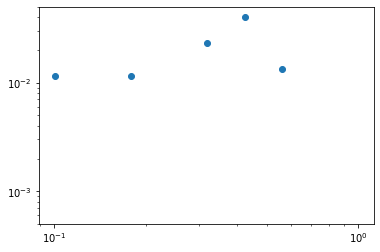

In [75]:
x_i_binned, k_i_binned = log_binning_function(list(distinct_pos_degrees),false_positive_count,B = 20)

plt.scatter(x_i_binned, k_i_binned)
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.0005,0.05])

Text(0, 0.5, 'DeepPurpose Prediction')

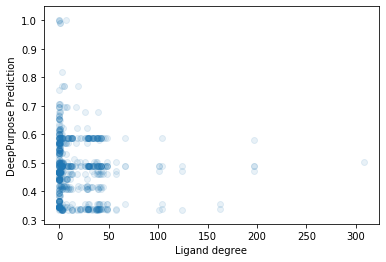

In [331]:
plt.scatter(test_false_positive_1000_seen_ligand['ligand_deg'],test_false_positive_1000_seen_ligand['Y_predicted'],alpha=0.1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Ligand degree',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

Text(0, 0.5, 'DeepPurpose Prediction')

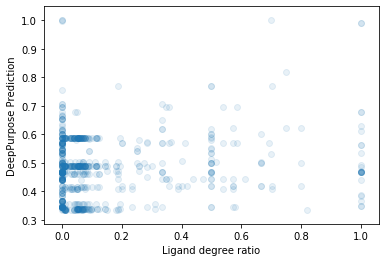

In [330]:
plt.scatter(test_false_positive_1000_seen_ligand['ligand_deg_ratio'],test_false_positive_1000_seen_ligand['Y_predicted'],alpha=0.1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Ligand degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

In [333]:
stats.spearmanr(test_false_positive_1000_seen_ligand['ligand_deg_ratio'],test_false_positive_1000_seen_ligand['Y_predicted'])

SpearmanrResult(correlation=0.01598648367752316, pvalue=0.6689080380416927)

Text(0, 0.5, 'DeepPurpose Prediction')

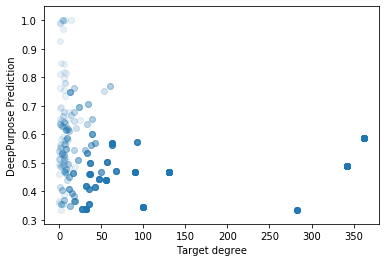

In [328]:
plt.scatter(test_false_positive_1000_seen_target['prot_deg'],test_false_positive_1000_seen_target['Y_predicted'],alpha=0.1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Target degree',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

Text(0, 0.5, 'DeepPurpose Prediction')

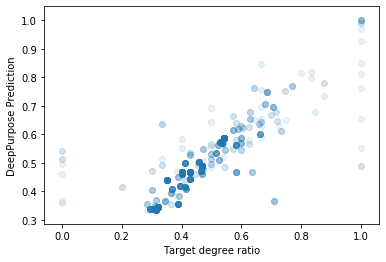

In [329]:
plt.scatter(test_false_positive_1000_seen_target['prot_deg_ratio'],test_false_positive_1000_seen_target['Y_predicted'],alpha=0.1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Target degree ratio',fontsize=10)
plt.ylabel('DeepPurpose Prediction',fontsize=10)

In [332]:
stats.spearmanr(test_false_positive_1000_seen_target['prot_deg_ratio'],test_false_positive_1000_seen_target['Y_predicted'])

SpearmanrResult(correlation=0.8917620194594222, pvalue=0.0)

## Example ligands and targets for False Positive predictions

In [114]:
test_false_positive_100_seen_ligand_sorted = test_false_positive_100_seen_ligand.sort_values(by='ligand_deg_ratio', ascending=False)
sorted_ligand_list = zip(test_false_positive_100_seen_ligand_sorted['SMILES'],test_false_positive_100_seen_ligand_sorted['ligand_deg_ratio'],test_false_positive_100_seen_ligand_sorted['ligand_deg'])
list(sorted_ligand_list)

[('C[C@@H]1OC(=O)[C@H]2C[C@H]3CCCC[C@@H]3[C@@H](\\C=C\\[C@H]3CCC[C@H](C)N3C)[C@@H]12',
  1.0,
  1),
 ('CCOc1cc2c(cn1)[nH]c1ccccc21', 1.0, 1),
 ('CC(C)NC(=O)c1ccc(NC(=O)N[C@@H](Cc2ccc(O)cc2)C(=O)N[C@H]2CCC[N+](C)(Cc3ccc(O)cc3)C2)cc1',
  1.0,
  1),
 ('CC[C@H](C)[C@H](NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)[C@H](CCSC)NC(=O)[C@H](CCCNC(N)=N)NC(=O)[C@H](CO)NC(=O)CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CO)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CCCN1C(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](C)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](N)C(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCCCN)C(O)=O',
  1.0,
  2),
 ('CO[C@H]1C[C@H](C)Cc2c(O)c(NC(=O)C(C)=CC=C[C@H](OC)[C@@H](OC(N)=O)\\C(C)=C\\[C@H](C)[C@H]1O)cc(O)c2N=CCCCNC(=O)Cc1ccc2N3CCC4OC5CC[N+]6=C(C5=CC4=C3C(C)(C)c2c1)C(C)(C)c1cc(ccc61)S([O-])(=O)=O',
  1.0,
  1),
 ('[NH3+][C@@H](Cc1ccc(OS([O-])(=O)=O)cc1)C([O-])=O', 1.0, 1),
 ('O[C@@](C\\C=C\\I)(C(=O)O[C@H]1CN2CCC1CC2)c1ccccc1', 0.8, 4),
 ('NS(=O)(=O)c1c(F)c(

In [115]:
test_false_positive_100_seen_target_sorted = test_false_positive_100_seen_target.sort_values(by='prot_deg_ratio', ascending=False)
sorted_target_list = zip(test_false_positive_100_seen_target_sorted['Target Sequence'],test_false_positive_100_seen_target_sorted['prot_deg_ratio'],test_false_positive_100_seen_target_sorted['prot_deg'])
list(sorted_target_list)

[('MDVKNSPSSLNSPVSYNCGQSILPLEPGPIYLPSSYVESRHEYSAVTFYSPAVMNYSIPNNSEDGPGRQTTSPNVLWPTPGHLSPLAIHCQSSLLYAEPQKSPWCETRSLEHTFPVNRETLKRKASGSSCASPVSSPSSKRDAHFCAVCSDYASGYHYGVWSCEGCKAFFKRSIQGHNDYICPATNQCTIDKNRRKSCQACRLRKCYEVGMVKCGSRRERCGYRIVRRQRNSDEQLHCLSKTKRNGAPMTRVKELLLSALSPEQLVLTLLEAEPPHVLMSRPSAPFTEASMMMSLTKLADKELVHMISWAKKIPGFVELSLYDQVRLLESCWLEVLMVGLMWRSIDHPGKLIFAPDLVLDRDEGKCVEGILEIFDMLLATTSRFRELKLQHKEYLCVKAMILLNSSMYPSATASQEADSGRKLTHLLNAVTDALVWVIAKSGMSSQQQSMRLANLLMLLSHVRHASNKGMEHLLNMKCKNVVPVYDLLLEMLNAHTLRSNKPLVTRSERNLAEDSESKEGSQKPQAQ',
  1.0,
  14),
 ('MGKAAAPSRGGGCGGRSRGLSSLFTVVPCLSCHTAAPGMSASTSGSGPEPKPQPQPVPEPERGPLSEQVSEAVSEAVPRSEPVSETTSEPEPGAGQPSELLQGSRPGSESSSGVGAGPFTKAASEPLSRAVGSATFLRPESGSLPALKPLPLLRPGQAKTPLGVPMSGTGTTSSAPLALLPKAVRVMNTHSDDSGDDDEATTPADKSELHHTLKNLSLKLDDLSTCNDLIAKHGAALQRSLTELDGLKIPSESGEKLKVVNERATLFRITSNAMINACRDFLELAEIHSRKWQRALQYEQEQRVHLEETIEQLAKQHNSLERAFHSAPGRPANPSKSFIEGSLLTPKGEDSEEDEDTEYFDAMEDSTSFITVITEAKEDSRKAEGSTGTSSVDWSSADNVLDGASLVPKGSSKVKRRVRIPNKPNYSLNLWSIMKNCIGRELSRIPMPVN

# Performances for Unseen Edges, Unseen Targets and Unseen Nodes

In [10]:
train_ran = pd.read_csv('Transformer_CNN_train.csv')
test_ran = pd.read_csv('Transformer_CNN_test.csv')

In [11]:
train_ligands = list(set(train_ran['SMILES'].tolist()))
train_targets = list(set(train_ran['Target Sequence'].tolist()))

test_minus_train_ligands = list(set(test_ran['SMILES'].tolist()).difference(train_ligands))
test_minus_train_targets = list(set(test_ran['Target Sequence'].tolist()).difference(train_targets))

In [12]:
print('Seen ligands: ', len(train_ligands))
print('Seen targets: ', len(train_targets))
print('Unseen ligands: ', len(test_minus_train_ligands))
print('Unseen targets: ', len(test_minus_train_targets))

Seen ligands:  10416
Seen targets:  1391
Unseen ligands:  2051
Unseen targets:  75


In [17]:
# Unseen Edges

test_unseen_edges = test_ran[test_ran['SMILES'].isin(train_ligands) & test_ran['Target Sequence'].isin(train_targets)]
print('Unseen edges: ', len(test_unseen_edges))

print('AUC: ', roc_auc_score(test_unseen_edges['Label'].tolist(), test_unseen_edges['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_edges['Label'].tolist(), test_unseen_edges['Y_predicted']))

Unseen edges:  11927
AUC:  0.8159355723996338
AUP:  0.481009834013135


In [18]:
# Unseen Targets

test_unseen_targets = test_ran[test_ran['Target Sequence'].isin(test_minus_train_targets)]
print('Unseen targets: ', len(test_unseen_targets))

print('AUC: ', roc_auc_score(test_unseen_targets['Label'].tolist(), test_unseen_targets['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_targets['Label'].tolist(), test_unseen_targets['Y_predicted']))

Unseen targets:  80
AUC:  0.7862669245647969
AUP:  0.7844919427109869


In [19]:
# Unseen Nodes

test_unseen_nodes = test_ran[test_ran['SMILES'].isin(test_minus_train_ligands) & test_ran['Target Sequence'].isin(test_minus_train_targets)]
print('Unseen nodes: ', len(test_unseen_nodes))

print('AUC: ', roc_auc_score(test_unseen_nodes['Label'].tolist(), test_unseen_nodes['Y_predicted']))
print('AUP: ', average_precision_score(test_unseen_nodes['Label'].tolist(), test_unseen_nodes['Y_predicted']))

Unseen nodes:  34
AUC:  0.49999999999999994
AUP:  0.36912234170761443


(array([41570.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7955.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

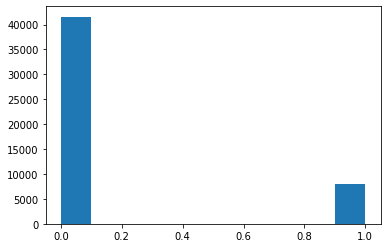

In [24]:
plt.hist(train_ran['Label'].tolist())

(array([11832.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2318.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

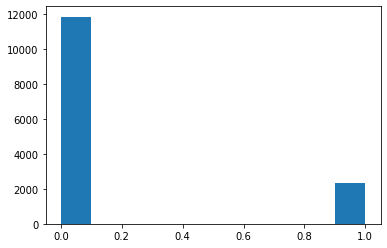

In [25]:
plt.hist(test_ran['Label'].tolist())

In [28]:
train_pos = train_ran[train_ran['Label'] == 1]
train_neg = train_ran[train_ran['Label'] == 0]

ligands_1 = set(train_pos['SMILES'].tolist())
ligands_0 = set(train_neg['SMILES'].tolist())
targets_1 = set(train_pos['Target Sequence'].tolist())
targets_0 = set(train_neg['Target Sequence'].tolist())

print('Total ligands: ', len(list(set(train_ran['SMILES'].tolist()))))
print('Total targets: ', len(list(set(train_ran['Target Sequence'].tolist()))))
print('Ligands with only positive: ', len(list(ligands_1.difference(ligands_0))))
print('Targets with only positive: ', len(list(targets_1.difference(targets_0))))
print('Ligands with only negative: ', len(list(ligands_0.difference(ligands_1))))
print('Targets with only negative: ', len(list(targets_0.difference(targets_1))))

Total ligands:  10416
Total targets:  1391
Ligands with only positive:  3084
Targets with only positive:  168
Ligands with only negative:  6539
Targets with only negative:  556
